In [1]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Настраиваем генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # предсказываем класс каждой точки для окрашивания в соответствующий цвет
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel делает массив 1D
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать все образцы
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    # вылелить тестовые образцы
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='Тестовый набор')

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
data = iris.data
target_names = iris.target_names
target = iris.target
feature_names = iris.feature_names



X = data[:, [2,3]] # Забираем третью и четвёртую колонки
y = target
np.unique(y) # Показывает категории

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# sc.fit(X_train) # Считает эмперическое среднее (ню) и стандартное отклонение (сигма)
# для каждой размерности признаков
# Стандартизирование значений, используя ню и сигма из предыдущего значения
# X_train_std = sc.transform(X_train) 
# X_test_std = sc.transform(X_test)   
# Если нужно меньше писать, ниже в две строчки
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined_std = np.hstack((y_train, y_test))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Классификатор на основе k-ближайших сосетей
Не извлекает различающую функцию из тренировочных данных, а, вместо этого, запомнитает тренировочный набор данных.

Алгоритмы машинного обучения можно сгруппировать в параметрические и непараметрические модели. Используя параметрические модели, мы выполняем оценивание параметров из тренировочного набора данных, чтобы извлечь функцию, которая сможет классифицировать новые точки данных, больше не требуя исходного тренировочного набора данных. Типичными примерами моделей являются персептрон, логистическая регрессия и линейный метод опорных векторов. Напротив, непараметрические модели не могут быть охарактеризованы фиксированным набором параметров, и число параметров в них растёт вместе с тренировочными данными. Двумя примерами непрараметрических моделей, которые мы видели до сих пор, являются классификатор на основе дерева решений/случайного леса и ядерный метод SVM.
Модель k-ближайших соседй принадлежит подкатегории непараметрических моделей, которая описывается как обучение на примерах или по прецедентам. Модели, в основе которых лежит обучение на примерах, характеризуются запоминанием тренировочного набора данных, и ленивое обучение является особым случаем обучения на примерах, которые связано с отсутствующей (нулевой) стоимостью во время процесса обучения.

Непосредственно сам алгоритм k ближайших соседей является довольно прямолинейным и может быть резюмирован следующими шагами:
1. Выбрать число k и метрику расстояния.
2. Найти k ближайших соседей образца, который мы ходим классифицировать.
3. Присвоить метку класса мажоритарным голосованием.


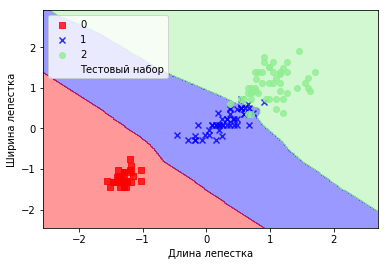

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=3, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel("Длина лепестка")
plt.ylabel("Ширина лепестка")
plt.legend(loc='upper left')
plt.show()